In [137]:
from pandas_datareader import get_data_yahoo as yh
df = yh(['BABA','AMZN','MSFT','GLD','ZM','KWEB','XLV','AMD','VZ','NVDA'])['Close']
df.to_csv('data_nigel_techcommsport.csv')

In [226]:
data = pd.read_csv('data_nigel_techcommsport.csv',index_col='Date',parse_dates = True)

In [262]:
import pandas as pd
# stocklist = ['AMD','VZ','NVDA','KWEB']
# stocklist = ['BABA','AMZN','MSFT','ZM','KWEB','XLV']
# stocklist = ['BABA','AMZN','MSFT','ZM','KWEB','XLV','AMD','VZ','NVDA']
stocklist = ['MSFT','ZM','BABA','XLV','AMD','VZ','NVDA']
df = pd.read_csv('data_nigel_techcommsport.csv',index_col='Date',parse_dates = True)
returns = df.pct_change()
df = df [stocklist]
equities = returns[stocklist]
div = returns[['GLD']]
weights_e = ((1 / equities.std()) / (1 / equities.std()).sum())*0.7
weights = pd.DataFrame(weights_e, columns = ['weights'])
weights = weights.reset_index()
weights = weights.append({'index':'GLD','weights':0.3},ignore_index=True)
weights = weights.set_index('index').T
weights = weights[stocklist+['GLD']]
returns = returns[stocklist+['GLD']]
weighted_returns = weights.values*returns
weighted_returns = weighted_returns.dropna()
portret = weighted_returns.sum(axis = 1)

In [263]:
(portret.mean() / portret.std()) * 16

1.5999558642139757

In [264]:
(1+portret.mean())**252-1

0.38461885864486556

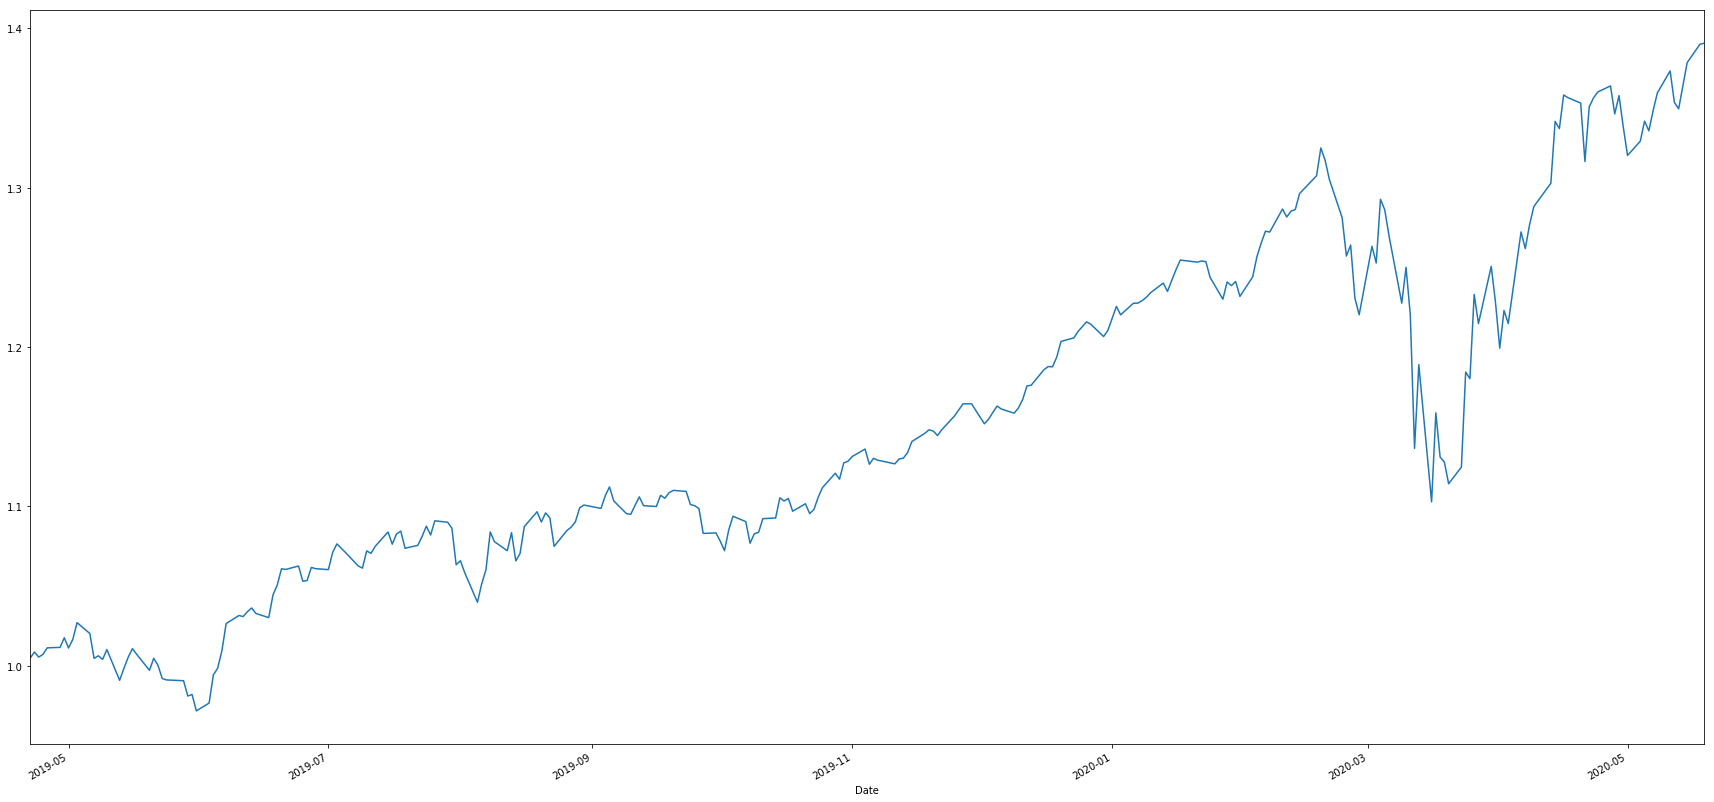

In [265]:
(1 + weighted_returns.sum(axis=1)).cumprod().plot(figsize=(30,15))

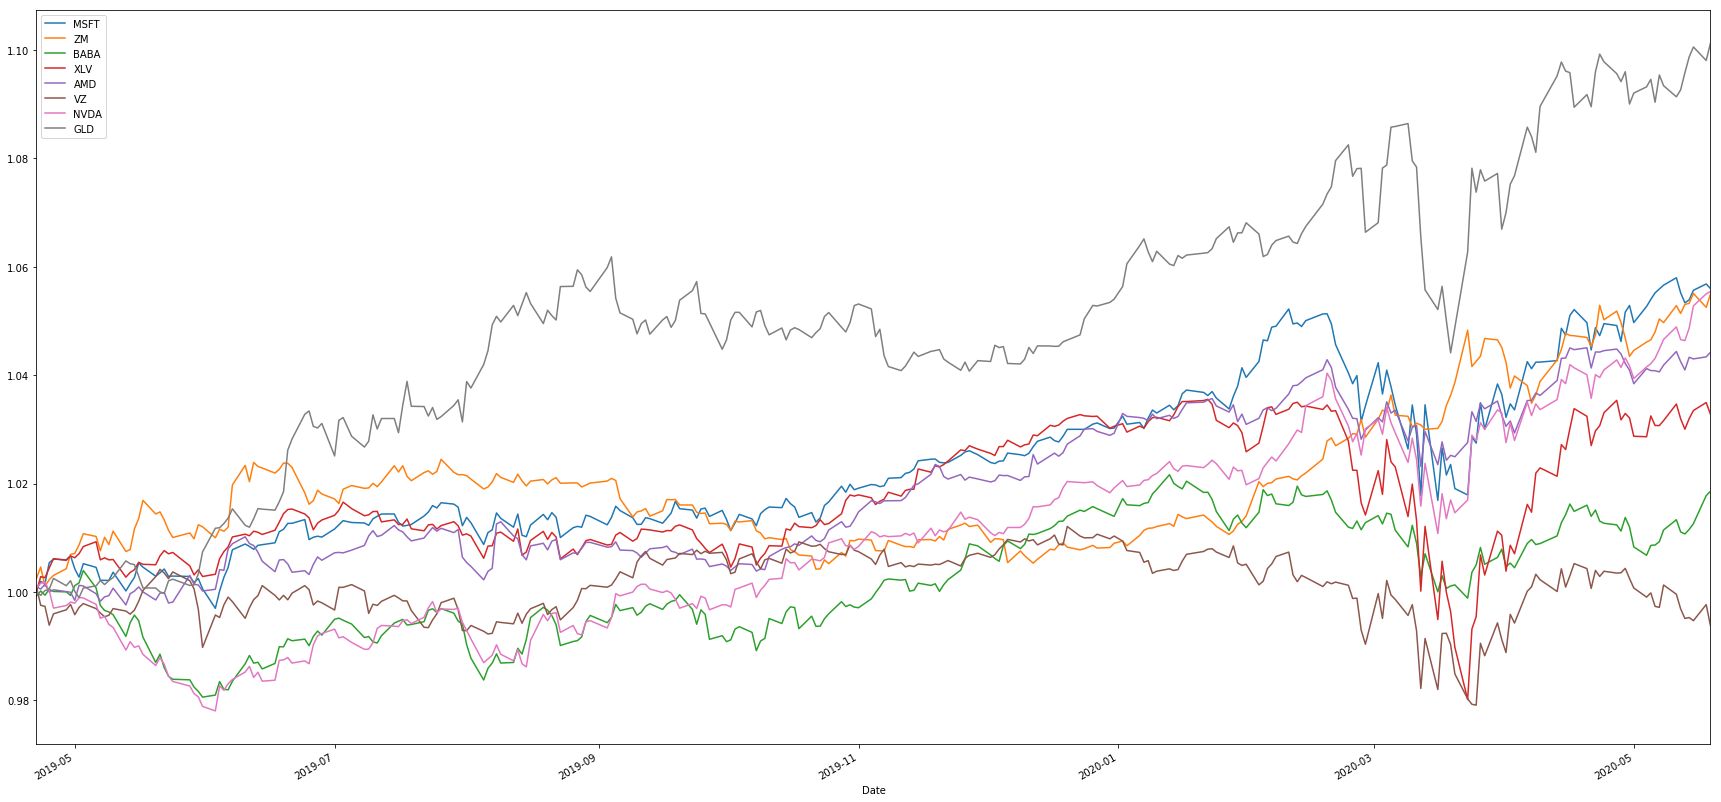

In [267]:
(1 + weighted_returns.dropna()).cumprod().plot(figsize=(30,15))

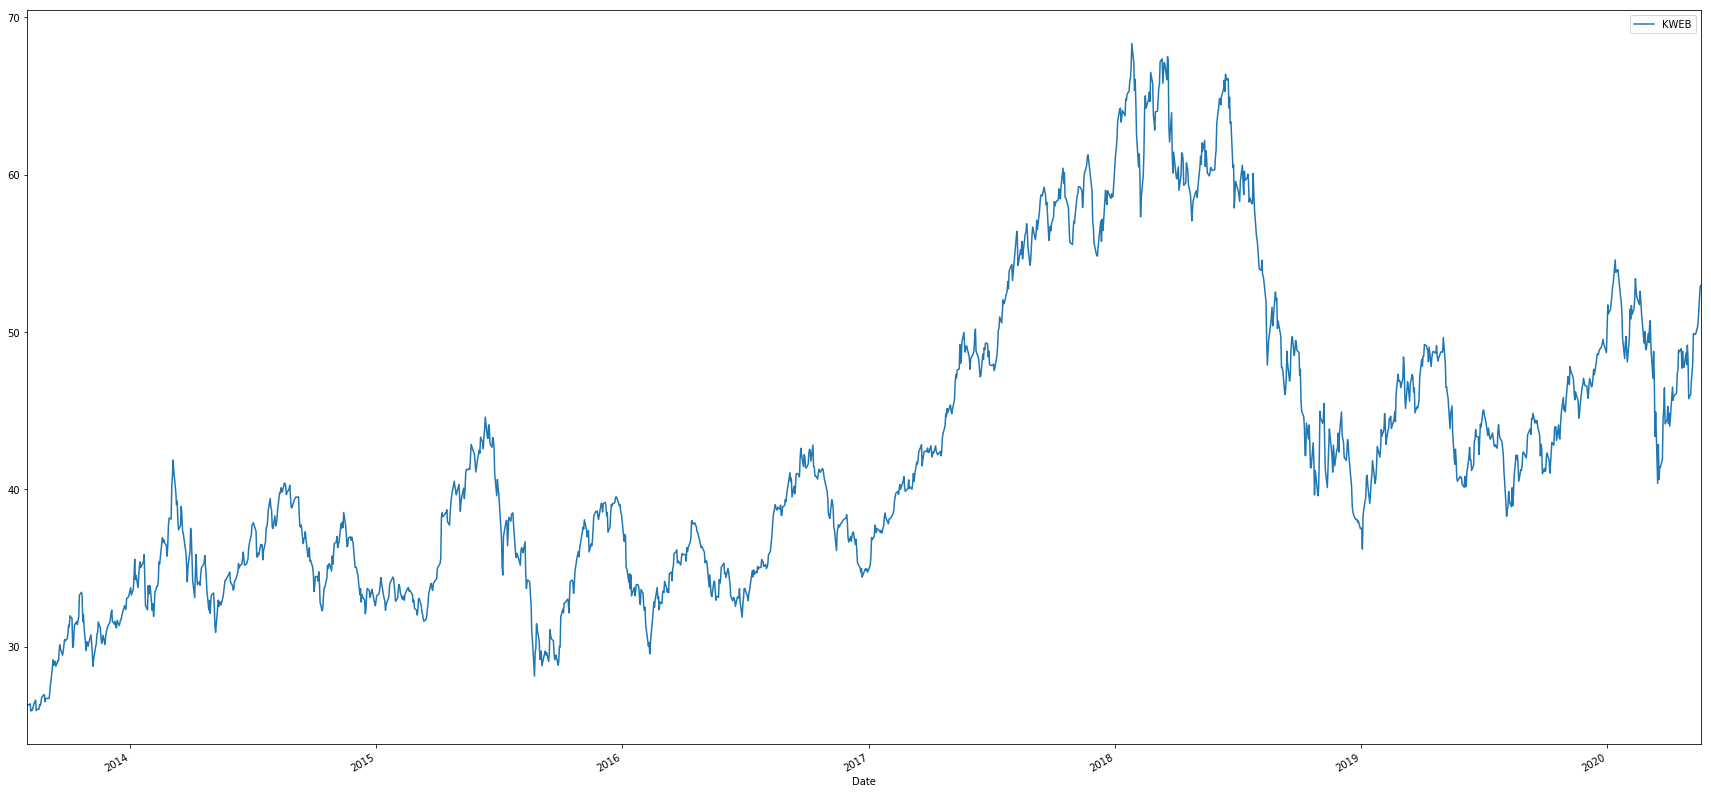

In [268]:
data[['KWEB']].dropna().plot(figsize=(30,15))

In [269]:
(weights * 10000).T

,weights
index,
MSFT,1157.711372
ZM,418.110915
BABA,895.387912
XLV,1723.565712
AMD,502.061015
VZ,1618.055925
NVDA,685.107149
GLD,3000.000000


In [272]:
(df.max())

MSFT    188.699997
ZM      174.830002
BABA    230.479996
XLV     104.730003
AMD      58.900002
VZ       62.070000
NVDA    352.220001
dtype: float64

In [281]:
(weights*10000)

index,MSFT,ZM,BABA,XLV,AMD,VZ,NVDA,GLD
weights,1157.711372,418.110915,895.387912,1723.565712,502.061015,1618.055925,685.107149,3000.0


In [279]:
data.tail(1)[stocklist+['GLD']]

,MSFT,ZM,BABA,XLV,AMD,VZ,NVDA,GLD
Date,,,,,,,,
2020-05-19,183.630005,173.679993,217.199997,100.029999,55.470001,54.380001,352.220001,164.259995


In [283]:
((weights*10000) / data.tail(1)[stocklist+['GLD']].values).round()

index,MSFT,ZM,BABA,XLV,AMD,VZ,NVDA,GLD
weights,6.0,2.0,4.0,17.0,9.0,30.0,2.0,18.0
